In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv("/content/Mall_Customers.csv")

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
#rename the columns
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [15]:
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Age Distribution')

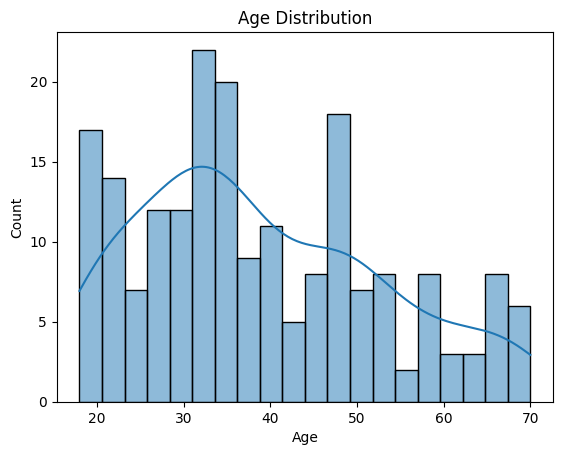

In [17]:
#Age distribution
sns.histplot(data['Age'],kde=True,bins=20)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Spending Score Distribution')

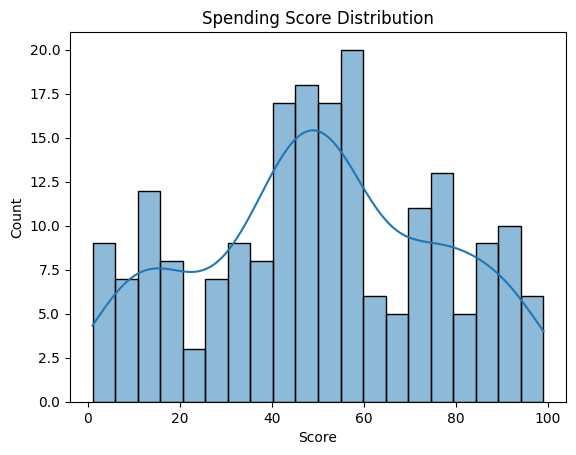

In [19]:
#Spending Score distribution
sns.histplot(data['Score'],kde=True,bins=20)
plt.title("Spending Score Distribution")

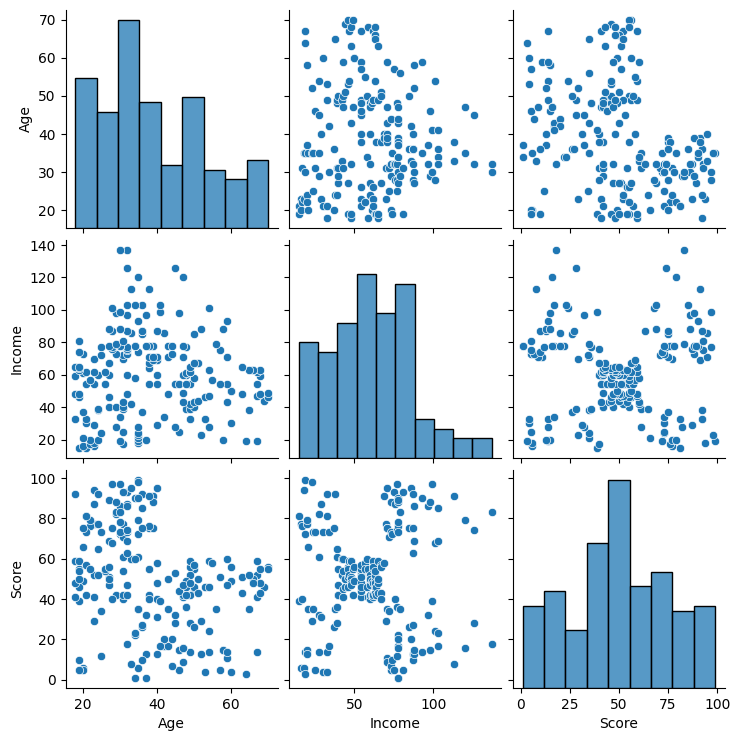

In [20]:
sns.pairplot(data[['Age','Income','Score']])
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
x=data[['Age','Income','Score']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

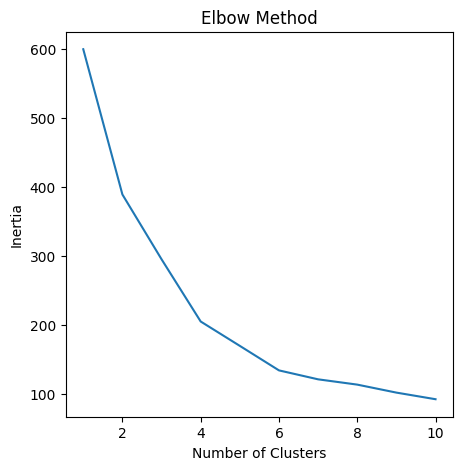

In [29]:
#Elbow method for finding optimal value of K
inertia=[]
K_range=range(1,11)
for k in K_range:
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.plot(K_range,inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [35]:
k=2
kmeans=KMeans(n_clusters=k)
data['Cluster']=kmeans.fit_predict(x_scaled)

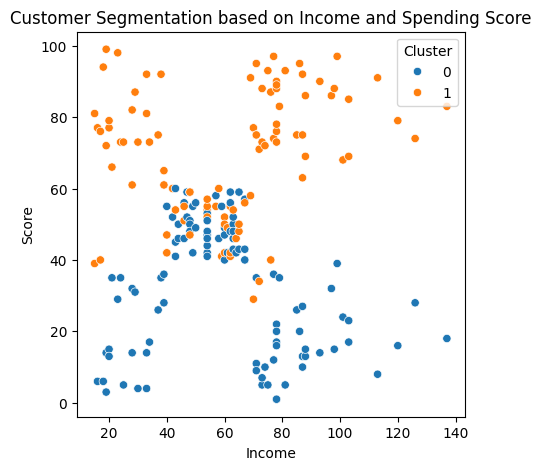

In [36]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data,x='Income',y='Score',hue='Cluster')
plt.title("Customer Segmentation based on Income and Spending Score")
plt.show()